In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Model defined and compiled successfully!")


Model defined and compiled successfully!


c:\New folder\VScode\potato-disease-classification\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [17]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
len(dataset)

68

In [19]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[164. 146. 146.]
  [162. 144. 144.]
  [159. 141. 141.]
  ...
  [150. 132. 132.]
  [151. 133. 133.]
  [150. 132. 132.]]

 [[151. 133. 133.]
  [152. 134. 134.]
  [153. 135. 135.]
  ...
  [152. 134. 134.]
  [148. 130. 130.]
  [143. 125. 125.]]

 [[141. 123. 123.]
  [145. 127. 127.]
  [149. 131. 131.]
  ...
  [161. 143. 143.]
  [152. 134. 134.]
  [144. 126. 126.]]

 ...

 [[185. 174. 178.]
  [188. 177. 181.]
  [192. 181. 185.]
  ...
  [209. 201. 199.]
  [205. 197. 195.]
  [200. 192. 190.]]

 [[185. 174. 178.]
  [188. 177. 181.]
  [193. 182. 186.]
  ...
  [211. 203. 201.]
  [209. 201. 199.]
  [206. 198. 196.]]

 [[188. 177. 181.]
  [190. 179. 183.]
  [194. 183. 187.]
  ...
  [214. 206. 204.]
  [215. 207. 205.]
  [215. 207. 205.]]], shape=(256, 256, 3), dtype=float32)
[1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 2 1 2 1 2 0 2]


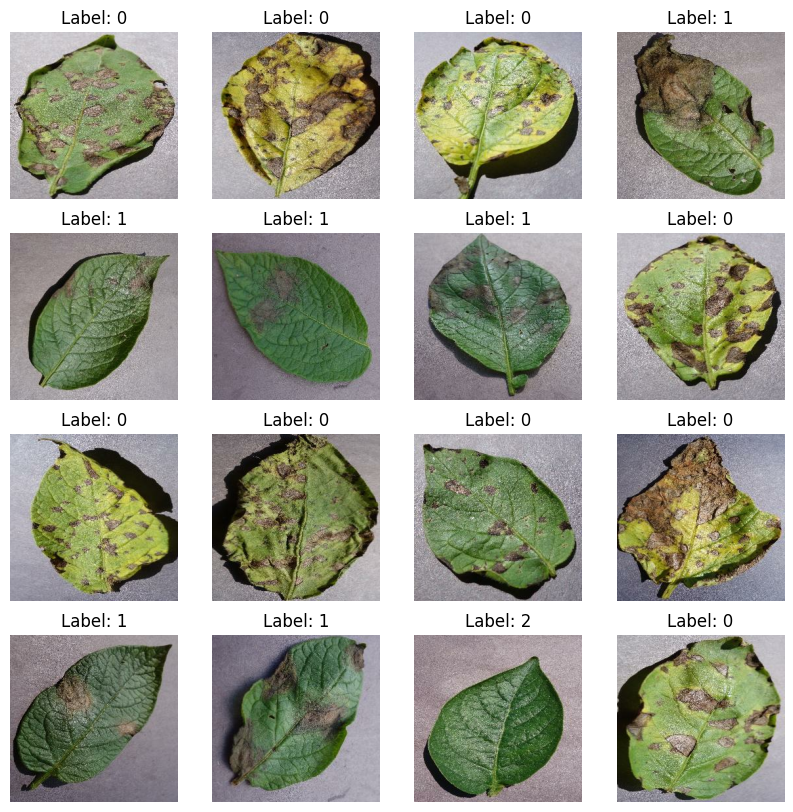

In [21]:
import matplotlib.pyplot as plt

for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    num_images = min(len(image_batch), 16)  # Display at most 16 images
    for i in range(num_images):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(f"Label: {label_batch[i]}")
        plt.axis("off")
    plt.show()


In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
test_ds = dataset.skip(54)
print(len(test_ds))

14


In [ ]:
val_ds = test_ds.take(6)
len(test_ds)

14

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
      
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = ds_size - train_size - val_size

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)
    
    return train_ds, val_ds, test_ds


In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)